### Modeling 전 데이터 적은 구간에 대한 oversampling 진행

#### 데이터 증강

In [ ]:
os_df = x_train_.join(y_train_, how='left')

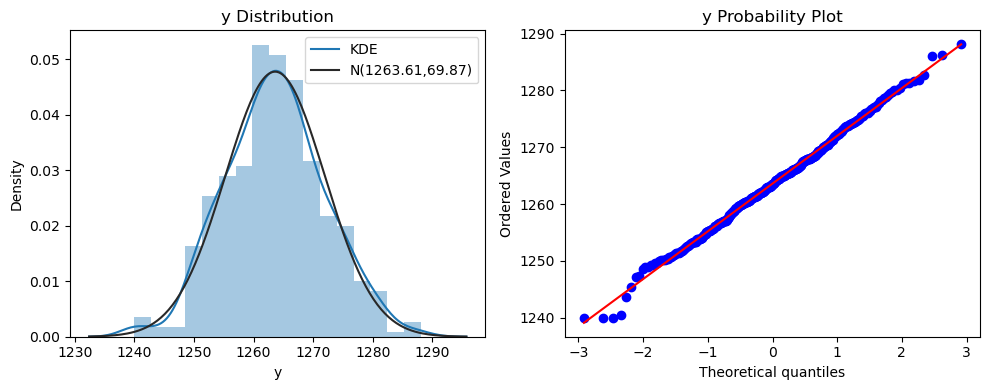

In [ ]:
QQ_plot(os_df['y'], 'y')

In [ ]:
len(os_df[os_df['y'] > 1283])

3

In [ ]:
os_df.loc[os_df['y'] < 1242, 'y_cate'] = 'A'
os_df.loc[(os_df['y'] >= 1242)&(os_df['y'] <= 1283), 'y_cate'] = 'B'
os_df.loc[os_df['y'] > 1283, 'y_cate'] = 'C'

In [ ]:
os_df, os_target = RandomOverSampler(random_state=1).fit_resample(os_df.drop('y_cate',axis=1), os_df['y_cate'])

In [ ]:
# os_df.drop('y',axis=1,inplace=True)

In [ ]:
x_train_ = os_df[os_df.columns[:x_train_.shape[1]]]
y_train_ = os_df[os_df.columns[-1]]

print(x_train.shape,y_train.shape)
print(x_train_.shape,y_train_.shape)
print(x_valid.shape,y_valid.shape)
print(x_test.shape, y_test.shape)

(488, 392) (488,)
(1149, 392) (1149,)
(98, 392) (98,)
(123, 392) (123,)


#### 기본 Auto ML

In [ ]:
from pycaret.regression import *

In [ ]:
reg = setup(os_df, target = 'y', train_size=0.6, session_id = 5, transformation = True)

# data = input data, target = target data, session_id = int (seed 정하기), normalize = 정규화 할지
# transfomation = 데이터를 정규화분포에 가깝게 하게 처리해줌
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,2.1215,20.0631,4.4193,0.9425,0.0035,0.0017,1.0990
et,Extra Trees Regressor,2.1216,20.6112,4.4942,0.9411,0.0036,0.0017,0.8650
lightgbm,Light Gradient Boosting Machine,2.1899,20.8833,4.5122,0.9404,0.0036,0.0017,0.3070
catboost,CatBoost Regressor,2.1985,20.8584,4.5221,0.9404,0.0036,0.0017,24.6620
gbr,Gradient Boosting Regressor,2.3817,22.6170,4.7152,0.9357,0.0037,0.0019,0.7170
knn,K Neighbors Regressor,2.6800,32.8759,5.5372,0.9041,0.0044,0.0021,0.1340
ada,AdaBoost Regressor,5.2980,36.5861,6.0308,0.8978,0.0048,0.0042,0.5610
dt,Decision Tree Regressor,3.2125,45.8994,6.7024,0.8709,0.0053,0.0025,0.1140
lasso,Lasso Regression,4.0646,52.1587,7.0173,0.8506,0.0056,0.0032,0.1620
en,Elastic Net,4.0393,52.8818,7.0524,0.8486,0.0056,0.0032,0.1570


In [ ]:
best_3 = compare_models(sort= 'RMSE', n_select = 3)
# train, valid로 나눈 값 -> 다시 train 하나로 합쳐 test 성능을 내야 함

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,2.1215,20.0631,4.4193,0.9425,0.0035,0.0017,0.1440
et,Extra Trees Regressor,2.1216,20.6112,4.4942,0.9411,0.0036,0.0017,0.1460
lightgbm,Light Gradient Boosting Machine,2.1899,20.8833,4.5122,0.9404,0.0036,0.0017,0.1040
catboost,CatBoost Regressor,2.1985,20.8584,4.5221,0.9404,0.0036,0.0017,0.1450
gbr,Gradient Boosting Regressor,2.3817,22.6170,4.7152,0.9357,0.0037,0.0019,0.1650
knn,K Neighbors Regressor,2.6800,32.8759,5.5372,0.9041,0.0044,0.0021,0.1270
ada,AdaBoost Regressor,5.2980,36.5861,6.0308,0.8978,0.0048,0.0042,0.1780
dt,Decision Tree Regressor,3.2125,45.8994,6.7024,0.8709,0.0053,0.0025,0.1250
lasso,Lasso Regression,4.0646,52.1587,7.0173,0.8506,0.0056,0.0032,0.1460
en,Elastic Net,4.0393,52.8818,7.0524,0.8486,0.0056,0.0032,0.1750


In [ ]:
blended = blend_models(estimator_list = best_3, fold = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.7828,16.7932,4.0980,0.9565,0.0032,0.0014
1,1.7542,15.3370,3.9162,0.9596,0.0031,0.0014
2,3.1323,33.3850,5.7780,0.8908,0.0046,0.0025
3,1.6996,13.6497,3.6945,0.9658,0.0029,0.0013
4,1.7340,15.1289,3.8896,0.9620,0.0031,0.0014
5,2.7372,26.3983,5.1379,0.9100,0.0041,0.0022
6,2.1235,20.5554,4.5338,0.9448,0.0036,0.0017
7,2.1262,20.7853,4.5591,0.9451,0.0036,0.0017
8,1.4918,11.6828,3.4180,0.9704,0.0027,0.0012


In [ ]:
finalized_model = finalize_model(blended)

In [ ]:
pred_final = predict_model(finalized_model, data = x_test)

In [ ]:
pred_final['prediction_label']

0      1267.398844
1      1261.968526
2      1263.756456
3      1259.567407
4      1261.772446
          ...     
118    1265.876001
119    1261.271901
120    1262.076311
121    1263.175388
122    1259.756563
Name: prediction_label, Length: 123, dtype: float64

In [ ]:
# mean_squared_error 의 매개변수 squared 가 False 이면 RMSE 를 반환합니다.
def rmse(y_true,y_pred):

    return round(mean_squared_error(y_true, y_pred,squared=False),4)

In [ ]:
rmse(y_test, pred_final['prediction_label'])

7.2167

In [ ]:
cat = create_model('catboost', cross_validation = False)
et = create_model('et', cross_validation = False)
rf = create_model('rf', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,1.9028,18.8362,4.3401,0.9527,0.0034,0.0015


In [ ]:
tuned_cat = tune_model(cat, optimize = 'RMSE', n_iter = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.8569,17.4232,4.1741,0.9549,0.0033,0.0015
1,1.8329,14.5990,3.8209,0.9615,0.0030,0.0015
2,2.7596,28.7755,5.3643,0.9059,0.0042,0.0022
3,1.8053,16.0795,4.0099,0.9597,0.0032,0.0014
4,1.7618,15.7379,3.9671,0.9604,0.0031,0.0014
5,2.8597,29.6566,5.4458,0.8989,0.0043,0.0023
6,1.9155,17.8889,4.2295,0.9520,0.0033,0.0015
7,2.1169,20.2969,4.5052,0.9464,0.0036,0.0017
8,1.3701,11.7100,3.4220,0.9703,0.0027,0.0011


In [ ]:
# mean_squared_error 의 매개변수 squared 가 False 이면 RMSE 를 반환합니다.
def rmse(y_true,y_pred):

    return round(mean_squared_error(y_true, y_pred,squared=False),4)

In [ ]:
final_cat_model = finalize_model(tuned_cat)


In [ ]:
pred_cat = predict_model(final_cat_model, data = x_test)

In [ ]:
rmse(y_test, pred_cat['prediction_label'])

7.0444

In [ ]:
tuned_cat = tune_model(cat, optimize = 'RMSE', n_iter = 20)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.8569,17.4232,4.1741,0.9549,0.0033,0.0015
1,1.8329,14.5990,3.8209,0.9615,0.0030,0.0015
2,2.7596,28.7755,5.3643,0.9059,0.0042,0.0022
3,1.8053,16.0795,4.0099,0.9597,0.0032,0.0014
4,1.7618,15.7379,3.9671,0.9604,0.0031,0.0014
5,2.8597,29.6566,5.4458,0.8989,0.0043,0.0023
6,1.9155,17.8889,4.2295,0.9520,0.0033,0.0015
7,2.1169,20.2969,4.5052,0.9464,0.0036,0.0017
8,1.3701,11.7100,3.4220,0.9703,0.0027,0.0011


In [ ]:
# mean_squared_error 의 매개변수 squared 가 False 이면 RMSE 를 반환합니다.
def rmse(y_true,y_pred):

    return round(mean_squared_error(y_true, y_pred,squared=False),4)

In [ ]:
final_cat_model = finalize_model(tuned_cat)


In [ ]:
pred_cat = predict_model(final_cat_model, data = x_test)

In [ ]:
rmse(y_test, pred_cat['prediction_label'])

7.0444

In [ ]:
tuned_cat = tune_model(cat, optimize = 'RMSE', n_iter = 30)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.8569,17.4232,4.1741,0.9549,0.0033,0.0015
1,1.8329,14.5990,3.8209,0.9615,0.0030,0.0015
2,2.7596,28.7755,5.3643,0.9059,0.0042,0.0022
3,1.8053,16.0795,4.0099,0.9597,0.0032,0.0014
4,1.7618,15.7379,3.9671,0.9604,0.0031,0.0014
5,2.8597,29.6566,5.4458,0.8989,0.0043,0.0023
6,1.9155,17.8889,4.2295,0.9520,0.0033,0.0015
7,2.1169,20.2969,4.5052,0.9464,0.0036,0.0017
8,1.3701,11.7100,3.4220,0.9703,0.0027,0.0011


In [ ]:
# mean_squared_error 의 매개변수 squared 가 False 이면 RMSE 를 반환합니다.
def rmse(y_true,y_pred):

    return round(mean_squared_error(y_true, y_pred,squared=False),4)

In [ ]:
final_cat_model = finalize_model(tuned_cat)


In [ ]:
pred_cat = predict_model(final_cat_model, data = x_test)

In [ ]:
rmse(y_test, pred_cat['prediction_label'])

7.0444

In [ ]:
tuned_et_n = tune_model(et, optimize = 'RMSE', n_iter = 15)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.8013,16.1226,4.0153,0.9582,0.0032,0.0014
1,1.8057,16.0717,4.0089,0.9577,0.0032,0.0014
2,2.9360,30.2971,5.5043,0.9009,0.0044,0.0023
3,1.7837,17.4818,4.1811,0.9561,0.0033,0.0014
4,1.7227,15.4848,3.9351,0.9611,0.0031,0.0014
5,2.8008,28.1046,5.3014,0.9042,0.0042,0.0022
6,2.0672,19.7892,4.4485,0.9469,0.0035,0.0016
7,2.0836,20.5235,4.5303,0.9458,0.0036,0.0016
8,1.4301,12.8652,3.5868,0.9674,0.0028,0.0011


In [ ]:
final_et_model_n = finalize_model(tuned_et_n)

In [ ]:
pred_et_n = predict_model(final_et_model_n, data = x_test)

In [ ]:
rmse(y_test, pred_et_n['prediction_label'])

7.2125

In [ ]:
tuned_rf_n = tune_model(rf, optimize = 'RMSE', n_iter = 15)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.9231,17.9493,4.2367,0.9535,0.0033,0.0015
1,1.8491,15.0179,3.8753,0.9604,0.0031,0.0015
2,2.8749,28.8787,5.3739,0.9056,0.0043,0.0023
3,1.7252,15.1910,3.8976,0.9619,0.0031,0.0014
4,1.6263,14.9463,3.8660,0.9624,0.0031,0.0013
5,2.9248,28.1782,5.3083,0.9040,0.0042,0.0023
6,2.1185,20.6729,4.5467,0.9445,0.0036,0.0017
7,2.3110,23.2849,4.8254,0.9385,0.0038,0.0018
8,1.4803,12.3385,3.5126,0.9687,0.0028,0.0012


In [ ]:
final_rf_model_n = finalize_model(tuned_rf_n)

In [ ]:
pred_rf_n = predict_model(final_rf_model_n, data = x_test)

In [ ]:
rmse(y_test, pred_rf['prediction_label'])

7.3723

In [ ]:
blender_specific = blend_models(estimator_list = [tuned_et_n,tuned_rf_n], optimize = 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.8009,16.5924,4.0734,0.9570,0.0032,0.0014
1,1.7668,15.8411,3.9801,0.9583,0.0032,0.0014
2,3.0306,31.7045,5.6307,0.8963,0.0045,0.0024
3,1.6937,14.8292,3.8509,0.9628,0.0030,0.0013
4,1.7370,15.1148,3.8878,0.9620,0.0031,0.0014
5,2.7631,27.4459,5.2389,0.9065,0.0041,0.0022
6,2.0882,19.8010,4.4498,0.9468,0.0035,0.0016
7,2.0756,20.8304,4.5640,0.9450,0.0036,0.0016
8,1.4099,11.7414,3.4266,0.9702,0.0027,0.0011


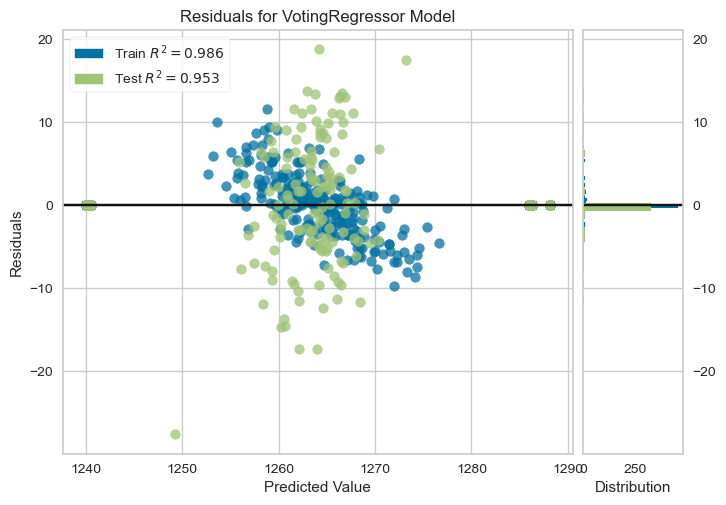

In [ ]:
plot_model(blender_specific)

In [ ]:
final_model = finalize_model(blender_specific)

In [ ]:
pred = predict_model(final_model, data = x_test)

In [ ]:
rmse(y_test, pred['prediction_label'])

7.167